# Petit guide de Python pour l'optimisation

## Quelques remarques générales pour la programmation en Python et l'utilisation de IPython :

* Faire attention à l'indentation.
* Ne pas oublier les **« : »** à la fin d'un def, if, else, elif, for, while etc…
* L'indexation d'un tableau ou d'une liste commence à 0.
* Pour valider une cellule dans un notebook, appuyer sur Maj+Entrée.

## Réflexe à avoir en TP :
* **Au début d'un TP**, ne pas oublier de lancer la commande **%pylab inline** se situant au début du notebook.

## Votre programme plante et/ou vous êtes bloqués :

* Vérifier les ":", l'indentation, si vous avez bien déclaré les variables que vous utilisez et la logique de votre programme (essayez de penser comme un ordinateur).
* **Utiliser l'aide** : si vous ne savez plus utiliser une fonction, taper **help**(nom_de_la_fonction) dans une cellule.
* Utiliser (gentiment) vos camarades, avec un regard critique !
* M'appeler… ;-)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib

## Définir une fonction :

Grâce à la commande **def**.

**Exemples :**

In [2]:
def binet(n):
    phi=(1+sqrt(5))/2
    return 1/sqrt(5)*(phi**n-(-1/phi)**n)
def dire(c):
    print(c)

dire("salut")

salut

## Listes et tableaux :


* Créer une liste vide : **l=[ ]**
* Ajouter un élément **e** à la liste **l** : **l.append(e)**
* Créer un tableau de taille N remplie de 0 : **zeros(N)**
* Créer un tableau de N nombres équiréparties entre a et b : **linspace(a,b,N)**
* Créer un tableau de N nombres équiréparties en échelle logarithmique entre 10^a et 10^b : **logspace(a,b,N)**



**Exemples :**

In [3]:
#l.append()
l=[]
print(l)
l.append(3)
print(l)

[]
[3]

In [4]:
#Remplir une liste avec les valeurs d'une suite définie par récurrence.
#Ici la suite de Fibonacci : x_{n+2}=x_{n+1}+x_n.
N=10
x=[0,1]
for i in range(N-2):
    x.append(x[i+1]+x[i])
print("x=",x)

x= [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [5]:
#Remplir un tableau avec les valeurs retournées par une fonction.
#Ici par la formule de Binet pour la suite de Fibonacci.
N=10
y=zeros(N)
for i in range(N):
    y[i]=binet(i)
print("y=",y)

y= [  0.   1.   1.   2.   3.   5.   8.  13.  21.  34.]

## Tracer et afficher des courbes, suites etc...
**plot( ) :**

Considérons x et y deux listes (ou tableaux) de taille N.

* **plot(y)** : place les points ( 0,y[0] ), ..., ( N-1,y[N-1] ) sur un graphique et les relient par un segment
* **plot(x,y)** : trace y en fonction de x c'est-à-dire place les points ( x[0],y[0] ),...,( x[N-1],y[N-1] ) sur un graphique et les relie par un segment
* **plot(x,y,'o')** : fait la même chose que plot(x,y) mais ne relie pas les points entre eux.
* **axis( )** : permet de définir la limite des axes des abscisses et des ordonnées. Voir l'exemple ci-dessous pour son utilisation.



**semilogy( ), semilogx( ), loglog( ) :**


* **semilogy( )** : idem que la fonction **plot( )** mais l'axe des ordonnées est en échelle logarithmique
* **semilogx( )** : idem que la fonction **plot( )** mais l'axe des abscisses est en échelle logarithmique
* **loglog( )** : idem que la fonction **plot( )** mais l'axe des abscisses et des ordonnées sont en échelle logarithmique


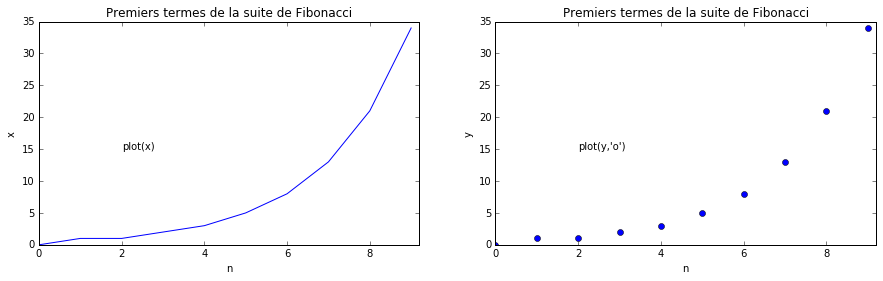

In [6]:
figure(figsize=(15,4)) #permet de définir la taille de la figure à afficher.
#figure de gauche
subplot(121) #défini la première sous-figure
plot(x)
axis([0, 9.2, 0, x[9]+1]) #axis([xmin, xmax, ymin, ymax])
xlabel("n")
ylabel("x")
title("Premiers termes de la suite de Fibonacci")
text(2,15,"plot(x)")

#figure de droite
subplot(122) #défini la deuxième sous-figure
plot(y,'o')
axis([0,9.2,0,x[9]+1])
xlabel("n")
ylabel("y")
title("Premiers termes de la suite de Fibonacci")
text(2,15,"plot(y,'o')")

show()

## Illustration de tout ce qui précède :  réponse à la question b) de l'exercice 2 du TD2

On cherche à minimiser la fonction suivante :
$$f_a(x_0,x_1)=1-\frac{1}{1+ax_0^2+x_1^2}.$$
Pour cela on utilise la méthode du gradient à pas fixe. On représente ci-dessous les lignes de niveau de la fonction $f_a$. On voit qu'elle admet un minimum en $0$. On s'attend donc à ce que la méthode du gradient converge linéairement vers $0$ pourvu que le pas $\alpha$ soit suffisamment petit (cf cours).

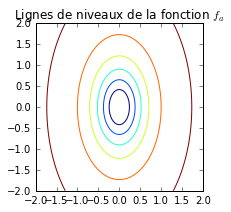

In [7]:
a=3
def fa(X):
    return 1-1/(1+a*X[0]**2+X[1]**2)

aX0=linspace(-2,2,100)
aX1=linspace(-2,2,100)
Z=array([[fa(array([x0,x1])) for x0 in aX0] for x1 in aX1])
figure(figsize=(3,3))
contour(aX0,aX1,Z) #trace les lignes de niveaux de la fonction fa
title("Lignes de niveaux de la fonction $f_a$")
axis("scaled")
show()

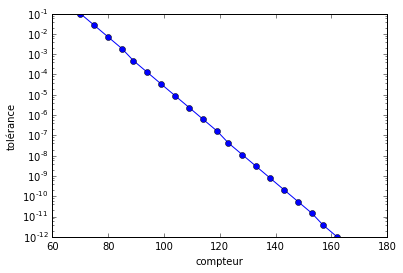

In [8]:
a=3

# On définit à la main la fonction gradient de f_a.
def gradfa(X):
    global compteur
    compteur=compteur+1
    d=(1+a*X[0]**2+X[1]**2)**2
    return 2/d*array([a,1])*X

# On écrit la descente de gradient. 
# Noter que l'on ne fait qu'une seule évalutation de la fonction gradient.
def methodeDescente(alpha,X0,eps):
    X=X0
    gX=gradfa(X0)
    while norm(gX)>eps:
        X=X-alpha*gX
        gX=gradfa(X)
    return X


X0=array([1,2]) # point de départ de la descente.
alpha=0.12
epsilon=logspace(-12,-1,20)
listen=[] # va contenir le nombre d'évaluations du gradient
          # dans descente de gradient pour obtenir précision epsilon.
for eps in epsilon:
    compteur=0
    methodeDescente(alpha,X0,eps)
    listen.append(compteur)

semilogy(listen,epsilon,'-o')
xlabel("compteur")
ylabel("tolérance")
show()

On a tracé grâce à **semilogy( )**, $\log(\varepsilon)$ en fonction de $n$ le nombre d'évalution du gradient dans la méthode de descente (fonction **methodeDescente( )**) pour avoir une précision $\varepsilon$. Illustrant ainsi le taux de convergence effectif de la méthode.

On voit que $\log(\varepsilon)=a\,n+b$ avec $a<0$. Donc $\varepsilon=C \alpha^n$ avec $0<\alpha=e^a <1$. Par conséquent le taux de convergence effectif est $\alpha$.

Ci-dessous une version alternative de la fonction **methodeDescente( )** où on n'optimise pas le nombre de fois où on utilise la fonction **gradfa( )**. À chaque passage de la boucle while, on évalue deux fois **gradfa( )** Au lieu de une fois pour **methodeDescente( )**.

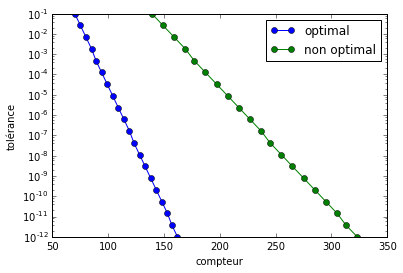

In [9]:
def methodeDescenteNonOpt(alpha,X0,eps):
    X=X0
    while norm(gradfa(X))>eps:
        X=X-alpha*gradfa(X)
    return X

listen_nonOpt=[] 

for eps in epsilon:
    compteur=0
    methodeDescenteNonOpt(alpha,X0,eps)
    listen_nonOpt.append(compteur)

semilogy(listen,epsilon,'-o',label="optimal")
semilogy(listen_nonOpt,epsilon,'-o',label="non optimal")
xlabel("compteur")
ylabel("tolérance")
legend()
show()

Comme prévu il faut deux fois plus d'évaluations de la fonction gradfa() dans la méthode non optimal que dans la méthode optimal (où on stocke le gradient dans la variable gX). Pour la courbe verte on a donc : $$\log(\varepsilon)=\tfrac12\, a\,n+b'.$$
Donc $\varepsilon=C' \sqrt{\alpha}^n$. Le taux de convergence linéaire dans le cas non optimal est donc $\sqrt{\alpha}>\alpha$.